In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


# Data EDA

In [2]:
train_df=pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
test_df=pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')

In [3]:
print(train_df.shape,test_df.shape)

(15289, 18) (10194, 17)


In [4]:
train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
test_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

train_df.corr()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,1.000000,0.003041,0.013690,0.003244,0.008948,0.004693,0.009528,0.009613,0.009504,0.009756,0.009544,0.009608,0.002340,0.001703,0.006061,0.004760,0.000867,0.000975
clonesize,0.003041,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.013690,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261,-0.118001
bumbles,0.003244,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022,0.161145
andrena,0.008948,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504,0.073969
osmia,0.004693,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597,0.198264
MaxOfUpperTRange,0.009528,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963,-0.022517
MinOfUpperTRange,0.009613,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812,-0.021929
AverageOfUpperTRange,0.009504,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082,-0.021940
MaxOfLowerTRange,0.009756,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378,-0.022197


In [6]:
train_df['RainingDays'].value_counts()

16.00    4361
24.00    3837
34.00    3521
1.00     3521
3.77       48
26.00       1
Name: RainingDays, dtype: int64

Distribution of Raining Days and Yield

<AxesSubplot: ylabel='Frequency'>

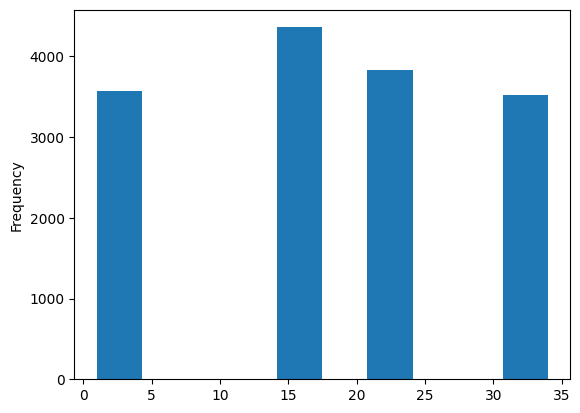

In [8]:
train_df['RainingDays'].plot(kind='hist')


<AxesSubplot: ylabel='Frequency'>

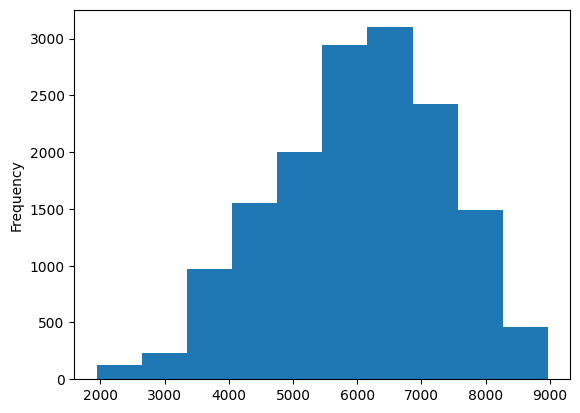

In [9]:
train_df['yield'].plot(kind='hist')


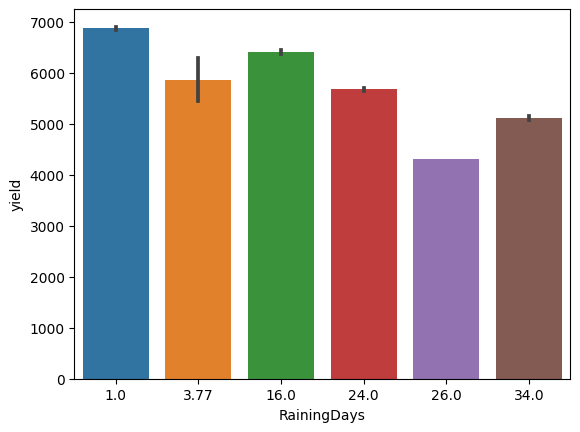

In [12]:
sns.barplot(data=train_df, x='RainingDays', y='yield')
plt.show() 

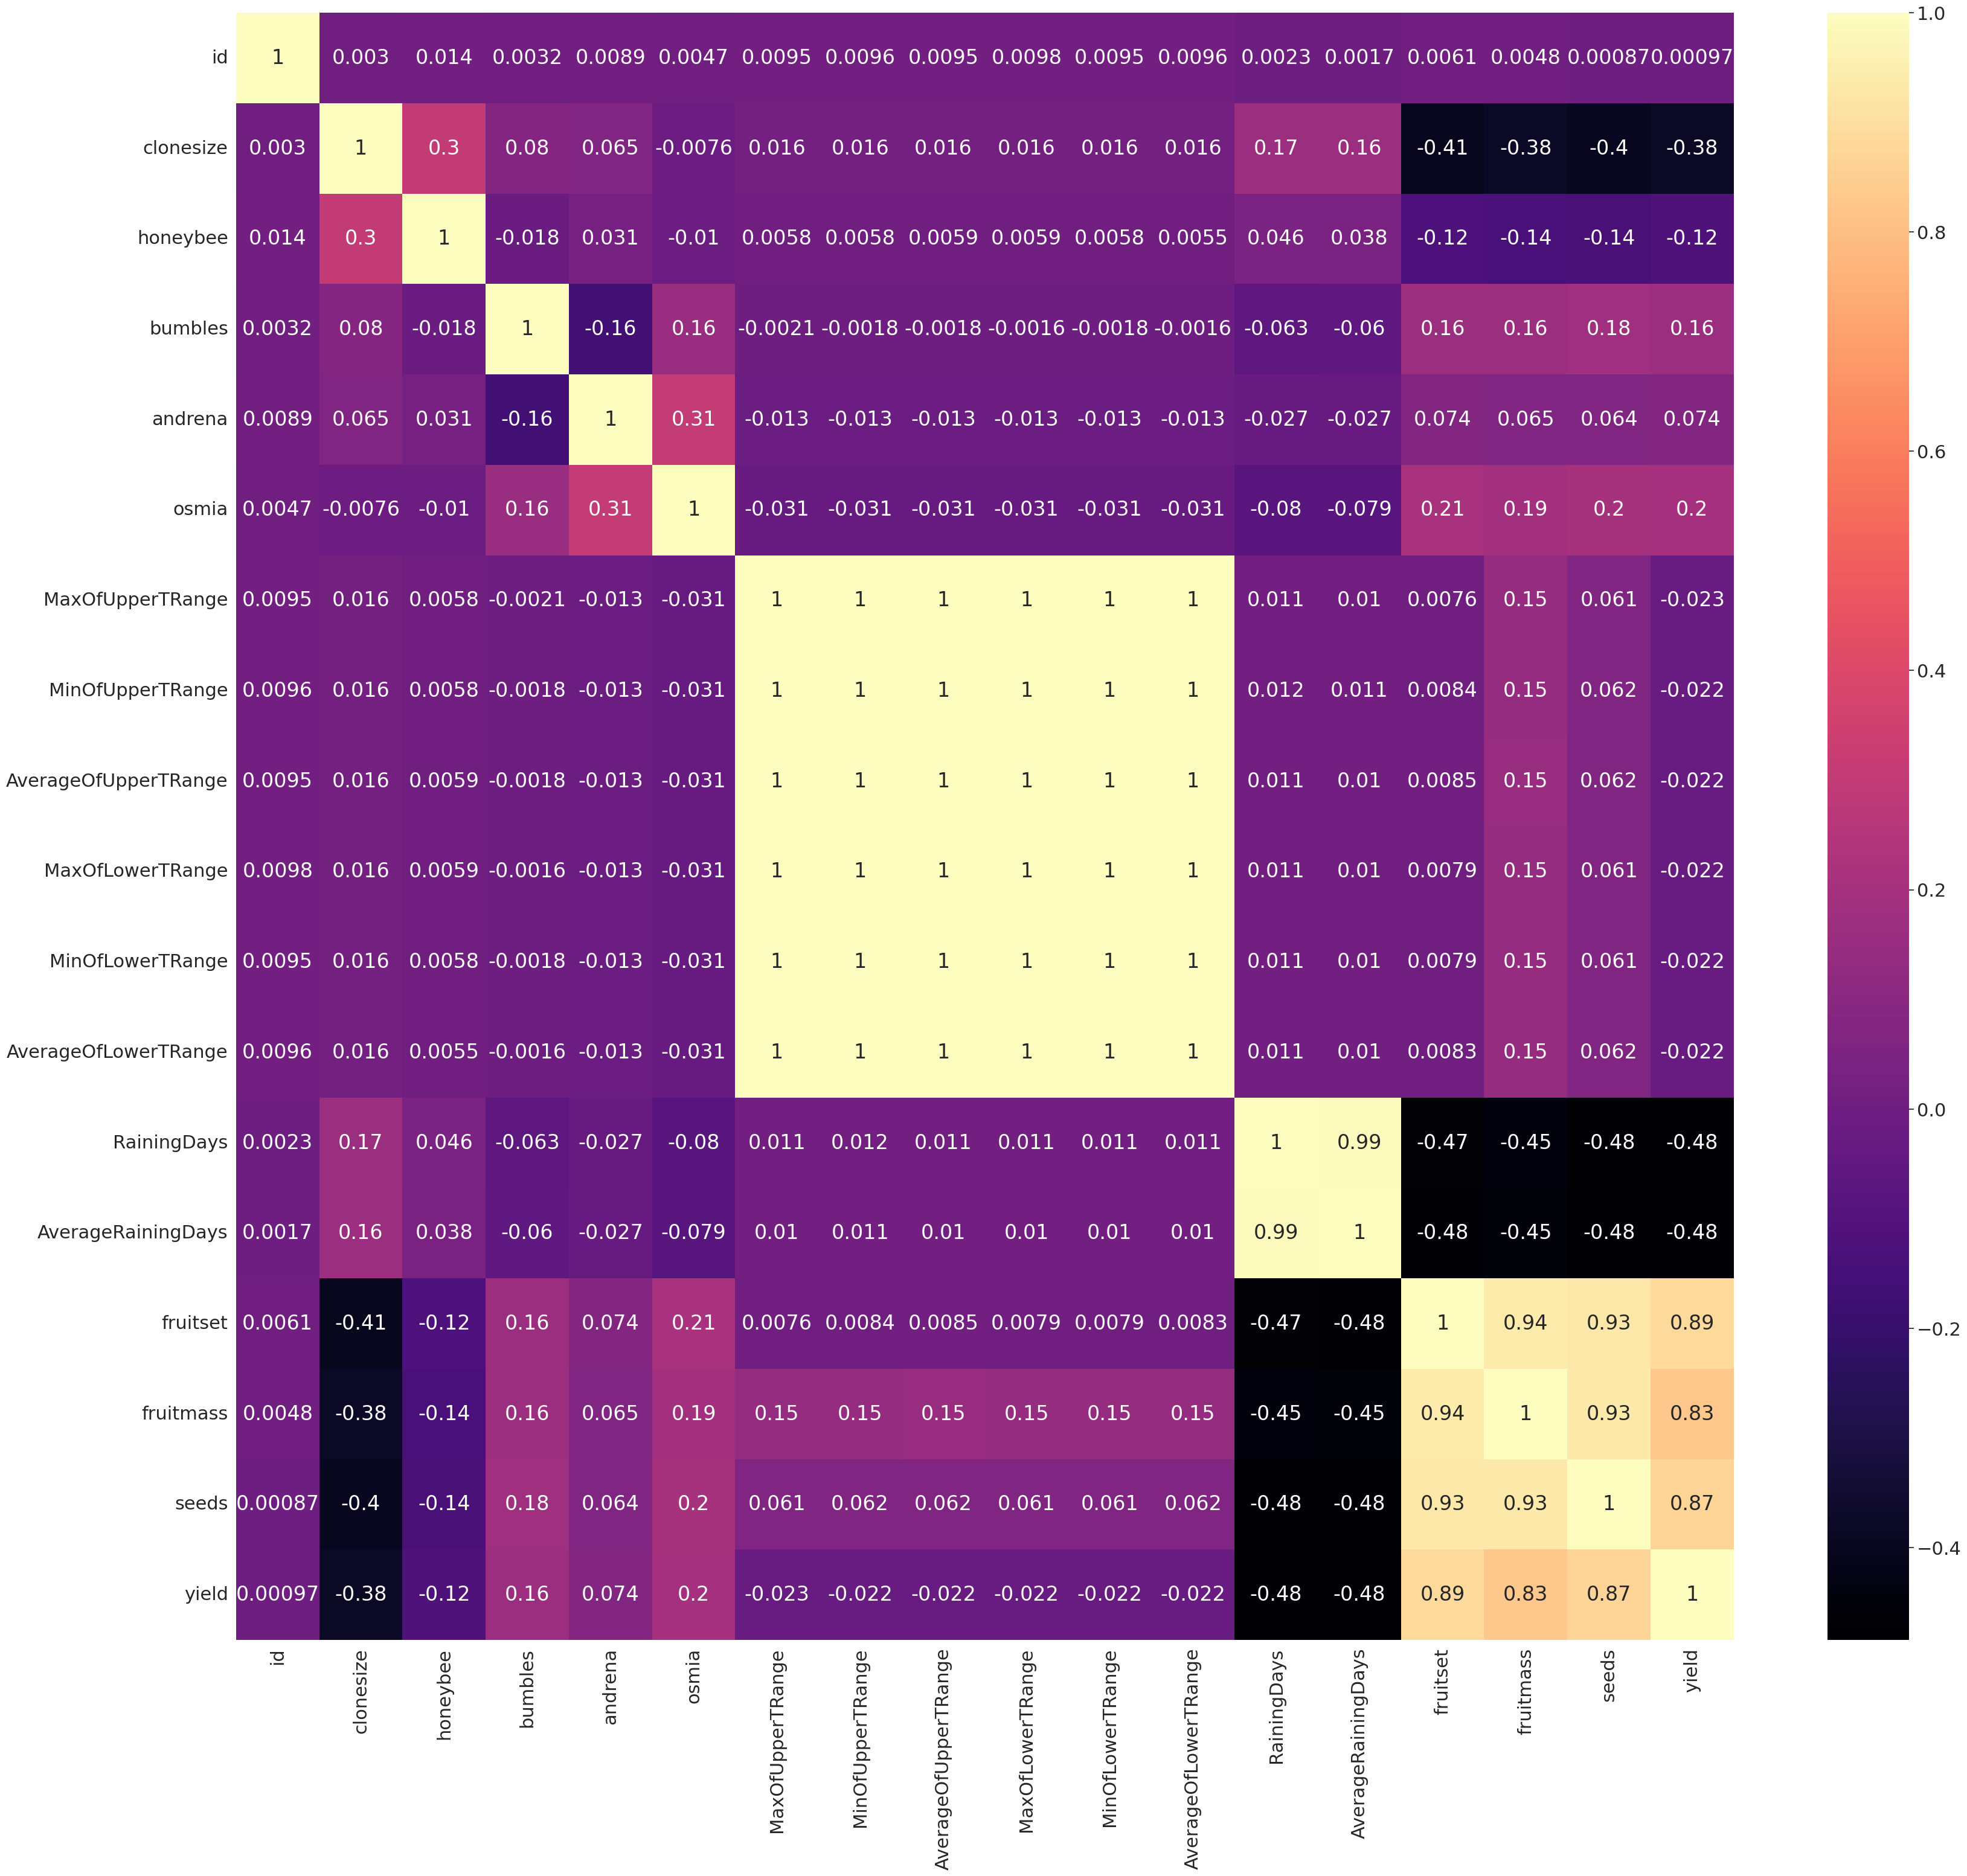

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=train_df.corr()
plt.figure(figsize=(40,35))
sns.set(font_scale=2) 
sns.heatmap(corr,annot=True,cmap='magma')

plt.show()

All the Tvalues fields are correlated with each other. 
Raining Days and Average Raining Days are correlated to each other.
Fruitset,Fruit mass and seeds are correlated with each other and also holds a strong correlation with yield.

# **Feauture Selections :**
# 1.A new field has to be created which should be the average of AverageOfLowerTRange and AverageOfUpperTRange,which has to be considered for modelling.
# 2.Average Raining Days has to be considered for modelling and Raining Days field has to be ignored(as Raining Days has strong correlation with Average Raining Days)


In [14]:
train_df['Average_T']=(train_df['AverageOfLowerTRange']+train_df['AverageOfUpperTRange'])/2
train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,Average_T
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146,49.70
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201,49.70
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760,61.35
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590,55.25
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417,55.25


In [15]:
test_df['Average_T']=(test_df['AverageOfLowerTRange']+test_df['AverageOfUpperTRange'])/2
test_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,Average_T
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569,61.35
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956,67.45
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644,61.35
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091,61.35
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019,67.45


# Dropping all the TRange values and Raining Days to avoid multicollineartiy

In [16]:
train_df = train_df.drop(['id','MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','RainingDays'],axis=1)
Test_df = test_df.drop(['id','MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','RainingDays'],axis=1)

In [17]:
Y=train_df['yield']
X=train_df.drop('yield',axis=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Used Linear Regrssion and Random Forest Regressor

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(r2_score(y_test, predictions))


333336.5856003513
370.63768214708256
0.8103818141191153


In [20]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(r2_score(y_test, predictions))

334429.47729756864
364.17058297238657
0.8097601237618524


# Checking the assumptions of Regression:
 1. Residuals Vs Predicted Values - Homoscedasticity (should follow a Random Cloud)
 2. Normality of Residuals - should follow a bell curve

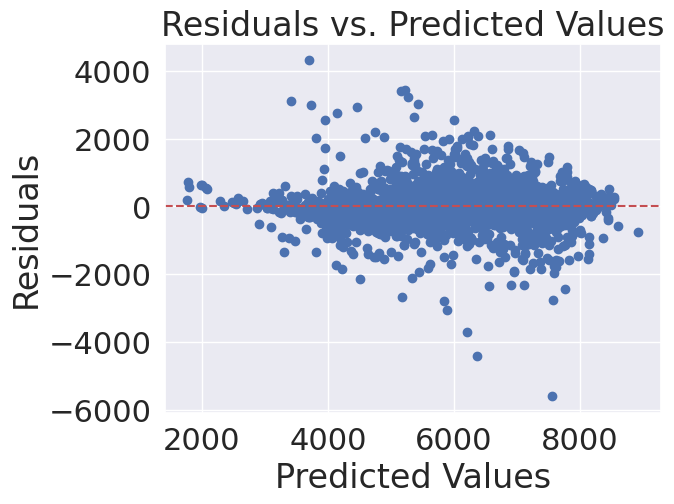

In [22]:
residuals = y_test - predictions

plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

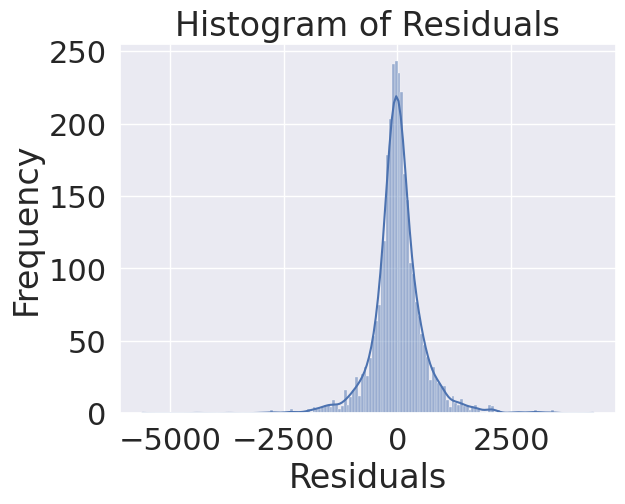

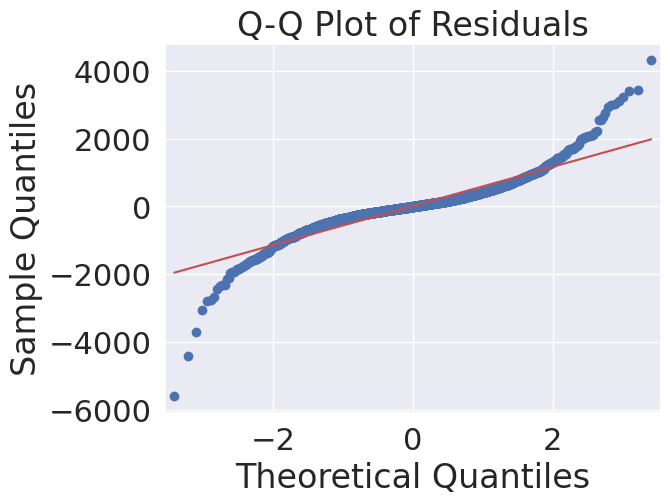

Shapiro-Wilk Test p-value: 9.753037311700727e-43


In [23]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

# Checking Multicollinearity 

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)

              feature          VIF
0           clonesize    13.076932
1            honeybee     2.401144
2             bumbles    27.114475
3             andrena    14.220381
4               osmia    22.866318
5  AverageRainingDays     5.951277
6            fruitset   440.569822
7           fruitmass  1165.104236
8               seeds   788.964338
9           Average_T    95.943059


# There are many fields with greater VIF values(fruitset, fruitmass, seeds and Average_T)
# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
alpha = 1.0  # Regularization strength, adjust as needed
ridge_model = Ridge(alpha=alpha)

# Fit the Ridge model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
predictions = ridge_model.predict(X_test_scaled)

# Evaluate your Ridge model's performance
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))

coefficients = ridge_model.coef_
print("Ridge Coefficients:", coefficients)

Mean Squared Error: 333344.56648573116
Mean Absolute Error: 370.64563831025896
R-squared: 0.8103772742003879
Ridge Coefficients: [-3.01191185e+01 -2.36441357e-01  1.97381439e+01  1.83561964e+01
  8.41096603e+00 -8.42054001e+01  8.73852001e+02 -2.80923284e+02
  5.55809487e+02 -3.12423809e+01]


Checking VIF again to make sure the multicollinearity effect is handled.

In [29]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(len(X.columns))]

print(vif_data)

              feature        VIF
0           clonesize   1.386845
1            honeybee   1.110994
2             bumbles   1.149032
3             andrena   1.186213
4               osmia   1.190620
5  AverageRainingDays   1.340658
6            fruitset  11.620460
7           fruitmass  12.390908
8               seeds   9.742458
9           Average_T   1.192515


# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
predictions = lasso_model.predict(X_test_scaled)

# Evaluate your Lasso model's performance
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))

# Print the coefficients
coefficients = lasso_model.coef_
print("Lasso Coefficients:", coefficients)

Mean Squared Error: 333487.30033433536
Mean Absolute Error: 370.653087345983
R-squared: 0.8102960801922733
Lasso Coefficients: [ -29.31089771   -0.           18.52606262   17.26711606    8.08076319
  -83.72535329  862.28492147 -259.67154092  546.82721498  -32.7631713 ]


# Using Ridge Regression model to predict the yield.

In [36]:
X_test_scaled = scaler.transform(Test_df)  # Use the scaler fitted on training data

# Predict on the test set
predictions_test = ridge_model.predict(X_test_scaled)

# Create a new DataFrame with the predicted 'yield' column
predicted_results = pd.DataFrame({'Predicted_Yield': predictions_test})

In [39]:
output = pd.DataFrame({'id': test_df.id, 'yield': predictions_test})
output.to_csv('submission.csv', index=False)